# Partial Differential Equations

### Problem 2(b) - Charge Density of a Square box using Conjugate Gradient

The Boundary Condition for the given condition (Square Box of Potential 1)


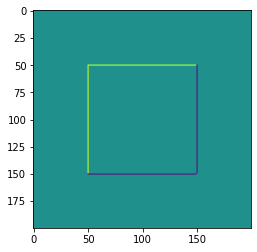

The corresponding Mask


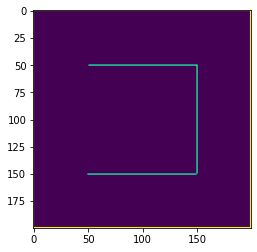

The Charge Density


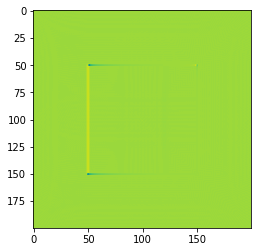

The Evolution of Potential of the Square Box


In [48]:
# Importing necessary libraries

import os
import imageio
import numpy as np
from IPython.display import Image
from matplotlib import pyplot as plt

# Average of neighbours as described in problem 1

def average_neighbors(mat):
    out=0*mat
    out=out+np.roll(mat,1,0)
    out=out+np.roll(mat,-1,0)
    out=out+np.roll(mat,1,1)
    out=out+np.roll(mat,-1,1)
    return out/4

class Grid: # Initialising our boundary conditions and calculating the average of neighbours
    def __init__(self,bc,mask):
        self.bc=bc
        self.mask=mask
        
    def make_rhs(self):
        rhs=average_neighbors(self.bc)
        rhs[self.mask]=0 
        return rhs
    
    def __matmul__(self,x):
        x[self.mask]=0
        ave=average_neighbors(x)
        ave[self.mask]=0
        return x-ave

filenames = []
def conjugate_gradient(A,b,x=None,niter=100):
    if x is None:
        x=0*b
    r=b-A@x
    p=r.copy()
    rtr=np.sum(r**2)
    
    for i in range(niter):
        Ap=A@p
        pAp=np.sum(p*Ap)
        alpha=rtr/pAp
        x=x+alpha*p
        r=r-alpha*Ap
        rtr_new=np.sum(r**2)
        beta=rtr_new/rtr
        p=r+beta*p
        rtr=rtr_new
      
        plt.clf()
        plt.imshow(x)
        filename = f'{i}.png'
        filenames.append(filename)
        plt.savefig(filename)   # Save the frame
        plt.close()
        
    # Build GIF
    with imageio.get_writer('Potential of Square Box.gif', mode='I') as writer:  # This GIF can be found in the folder
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    # Remove Files
    for filename in set(filenames):
        os.remove(filename) 
        
    return x

n=200
mask=np.zeros([n,n],dtype='bool')
bc=np.zeros([n,n])
x=np.linspace(-1,1,n)
xsqr=np.outer(x**2,np.ones(n))
rsqr=xsqr+4*xsqr.T
mask[:,0]=True
mask[0,:]=True
mask[-1,:]=True
mask[:,-1]=True

# Defining our boundary conditions and Mask
bc[n//4,n//4:(3*n)//4]=1.0
bc[(3*n)//4,n//4:(3*n)//4]=-1.0
bc[n//4:(3*n)//4,n//4]=1.0
bc[n//4:(3*n)//4,3*n//4]=-1.0

mask[n//4,n//4:(3*n)//4]=True
mask[(3*n)//4,n//4:(3*n)//4]=True
mask[n//4:(3*n)//4,n//4]=False
mask[n//4:(3*n)//4,3*n//4]=True

# Now we can solve the matrix A * x = b

A = Grid(bc,mask)
b = A.make_rhs()
V = conjugate_gradient(A,b)

V[A.mask] = A.bc[A.mask]
Ex = V-np.roll(V,-1,0)
Ey = V-np.roll(V,-1,1)

ρ = V - average_neighbors(V)  # The charge density

print('The Boundary Condition for the given condition (Square Box of Potential 1)')
plt.imshow(bc)
plt.show()

print('The corresponding Mask')
plt.imshow(mask)
plt.show()

print('The Charge Density')
plt.imshow(ρ)
plt.show()

print('The Evolution of Potential of the Square Box')
Image(url='Potential of Square Box.gif')  